In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Forecast.csv')
df.head()

,Data,Dia Semana,Total Uh,Real - Uh Ocupada,Real - ADR,Real - Receita,OnB Indiv. - Uh Ocupada,OnB Indiv. - ADR,OnB Indiv. - Receita,OnB Grupo - Uhs Ocupada,OnB Grupo - ADR,OnB Grupo - Receita,POA - Uh Ocupada,POA - ADR,POA - Receita
0,2022-01-01 00:00:00,Sábado,96,33,186.612727,6158.22,NaN,NaN,NaN,NaN,NaN,NaN,26,175.949804,4575
1,2022-01-02 00:00:00,Domingo,96,36,183.996667,6623.88,NaN,NaN,NaN,NaN,NaN,NaN,24,175.907304,4222
2,2022-01-03 00:00:00,Segunda,96,40,193.209500,7728.38,NaN,NaN,NaN,NaN,NaN,NaN,39,176.433651,6881
3,2022-01-04 00:00:00,Terça,96,46,184.547609,8489.19,NaN,NaN,NaN,NaN,NaN,NaN,43,176.459805,7588
4,2022-01-05 00:00:00,Quarta,96,54,184.261111,9950.10,NaN,NaN,NaN,NaN,NaN,NaN,43,176.459805,7588


### Exploração de dados:

In [ ]:
df.shape

(1096, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     1096 non-null   object 
 1   Dia Semana               1096 non-null   object 
 2   Total Uh                 1096 non-null   int64  
 3   Real - Uh Ocupada        1096 non-null   int64  
 4   Real - ADR               1095 non-null   float64
 5   Real - Receita           1096 non-null   float64
 6   OnB Indiv. - Uh Ocupada  0 non-null      float64
 7   OnB Indiv. - ADR         0 non-null      float64
 8   OnB Indiv. - Receita     0 non-null      float64
 9   OnB Grupo - Uhs Ocupada  0 non-null      float64
 10  OnB Grupo - ADR          0 non-null      float64
 11  OnB Grupo - Receita      0 non-null      float64
 12  POA - Uh Ocupada         1096 non-null   int64  
 13  POA - ADR                1096 non-null   float64
 14  POA - Receita           

Verificando e corrigindo valores nulos:

In [ ]:
is_null = df.isnull().sum()
print(f'valores nulos: {is_null}')

valores nulos: Data                          0
Dia Semana                    0
Total Uh                      0
Real - Uh Ocupada             0
Real - ADR                    1
Real - Receita                0
OnB Indiv. - Uh Ocupada    1096
OnB Indiv. - ADR           1096
OnB Indiv. - Receita       1096
OnB Grupo - Uhs Ocupada    1096
OnB Grupo - ADR            1096
OnB Grupo - Receita        1096
POA - Uh Ocupada              0
POA - ADR                     0
POA - Receita                 0
dtype: int64


In [ ]:
df['Real - ADR'].describe().round(2)

,Real - ADR
count,1095.00
mean,252.72
std,41.36
min,0.00
25%,220.13
50%,251.11
75%,283.13
max,420.69


In [ ]:
df['Real - ADR'].fillna(df['Real - ADR'].mean(), inplace = True)

In [ ]:
is_null = df.isnull().sum()
print(f'valores nulos: {is_null}')

valores nulos: Data                          0
Dia Semana                    0
Total Uh                      0
Real - Uh Ocupada             0
Real - ADR                    0
Real - Receita                0
OnB Indiv. - Uh Ocupada    1096
OnB Indiv. - ADR           1096
OnB Indiv. - Receita       1096
OnB Grupo - Uhs Ocupada    1096
OnB Grupo - ADR            1096
OnB Grupo - Receita        1096
POA - Uh Ocupada              0
POA - ADR                     0
POA - Receita                 0
dtype: int64


Mantendo somente as variáveis que vamos utilizar:

In [ ]:
df_ajustado = df.drop(columns=['OnB Indiv. - Uh Ocupada', 'OnB Indiv. - ADR', 'OnB Indiv. - Receita', 'OnB Grupo - Uhs Ocupada',
                      'OnB Grupo - ADR', 'OnB Grupo - Receita'])

In [ ]:
df_ajustado.head()

,Data,Dia Semana,Total Uh,Real - Uh Ocupada,Real - ADR,Real - Receita,POA - Uh Ocupada,POA - ADR,POA - Receita
0,2022-01-01 00:00:00,Sábado,96,33,186.612727,6158.22,26,175.949804,4575
1,2022-01-02 00:00:00,Domingo,96,36,183.996667,6623.88,24,175.907304,4222
2,2022-01-03 00:00:00,Segunda,96,40,193.209500,7728.38,39,176.433651,6881
3,2022-01-04 00:00:00,Terça,96,46,184.547609,8489.19,43,176.459805,7588
4,2022-01-05 00:00:00,Quarta,96,54,184.261111,9950.10,43,176.459805,7588


Renomeando as variáveis:

In [ ]:
df_ajustado.rename(columns={'Data': 'data', 'Dia Semana': 'dia_semana', 'Total Uh': 'total_uh', 'Real - Uh Ocupada': 'uhs_ocupadas',
                            'Real - ADR': 'adr', 'Real - Receita': 'receita', 'POA - Uh Ocupada': 'meta_uh_ocupada',
                            'POA - ADR': 'meta_adr', 'POA - Receita': 'meta_receita'}, inplace = True)
df_ajustado.head()

,data,dia_semana,total_uh,uhs_ocupadas,adr,receita,meta_uh_ocupada,meta_adr,meta_receita
0,2022-01-01 00:00:00,Sábado,96,33,186.612727,6158.22,26,175.949804,4575
1,2022-01-02 00:00:00,Domingo,96,36,183.996667,6623.88,24,175.907304,4222
2,2022-01-03 00:00:00,Segunda,96,40,193.209500,7728.38,39,176.433651,6881
3,2022-01-04 00:00:00,Terça,96,46,184.547609,8489.19,43,176.459805,7588
4,2022-01-05 00:00:00,Quarta,96,54,184.261111,9950.10,43,176.459805,7588


Corrigindo a variável data:

In [ ]:
df_ajustado['data'] = pd.to_datetime(df_ajustado['data'])
df_ajustado['data']

,data
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05
...,...
1091,2024-12-27
1092,2024-12-28
1093,2024-12-29
1094,2024-12-30


Transformando os dias da semana para valores numericos:
- 0: Domingo
- 1: Segunda
- 2: Terça
- 3: Quarta
- 4: Quinta
- 5: Sexta
- 6: Sábado

In [ ]:
df_ajustado['dia_semana'] = df_ajustado['dia_semana'].replace({'Domingo': 0, 'Segunda': 1, 'Terça': 2, 'Quarta': 3, 'Quinta': 4, 'Sexta': 5, 'Sábado': 6})
df_ajustado.head()

,data,dia_semana,total_uh,uhs_ocupadas,adr,receita,meta_uh_ocupada,meta_adr,meta_receita
0,2022-01-01,6,96,33,186.612727,6158.22,26,175.949804,4575
1,2022-01-02,0,96,36,183.996667,6623.88,24,175.907304,4222
2,2022-01-03,1,96,40,193.209500,7728.38,39,176.433651,6881
3,2022-01-04,2,96,46,184.547609,8489.19,43,176.459805,7588
4,2022-01-05,3,96,54,184.261111,9950.10,43,176.459805,7588


Criando as variáveis de ocupação e meta de ocupação:

In [ ]:
df_ajustado['occ'] = (df_ajustado['uhs_ocupadas'] / df_ajustado['total_uh'])*100
df_ajustado['meta_occ'] = (df_ajustado['meta_uh_ocupada'] / df_ajustado['total_uh'])*100
df_ajustado.head()

,data,dia_semana,total_uh,uhs_ocupadas,adr,receita,meta_uh_ocupada,meta_adr,meta_receita,occ,meta_occ
0,2022-01-01,6,96,33,186.612727,6158.22,26,175.949804,4575,34.375000,27.083333
1,2022-01-02,0,96,36,183.996667,6623.88,24,175.907304,4222,37.500000,25.000000
2,2022-01-03,1,96,40,193.209500,7728.38,39,176.433651,6881,41.666667,40.625000
3,2022-01-04,2,96,46,184.547609,8489.19,43,176.459805,7588,47.916667,44.791667
4,2022-01-05,3,96,54,184.261111,9950.10,43,176.459805,7588,56.250000,44.791667


Salvando nosso dataset:

In [ ]:
df_ajustado.to_csv('df_ajustado.csv', index=False)

ADR ao longo do tempo:

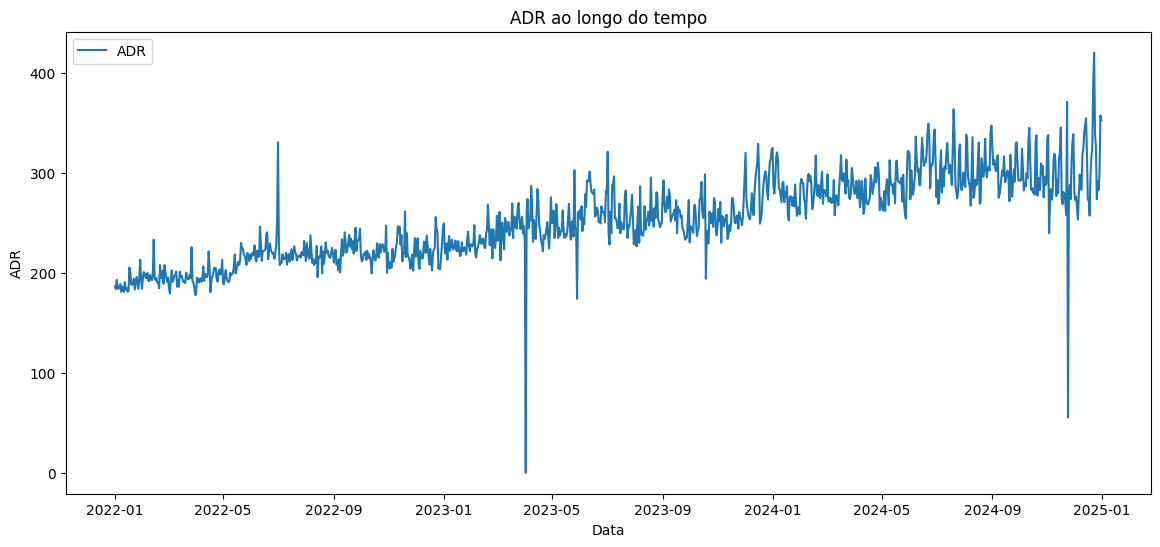

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_ajustado, x='data', y='adr', label='ADR')
plt.title('ADR ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('ADR')
plt.show()

Distribuição da ADR:

Text(0, 0.5, 'Frequência')

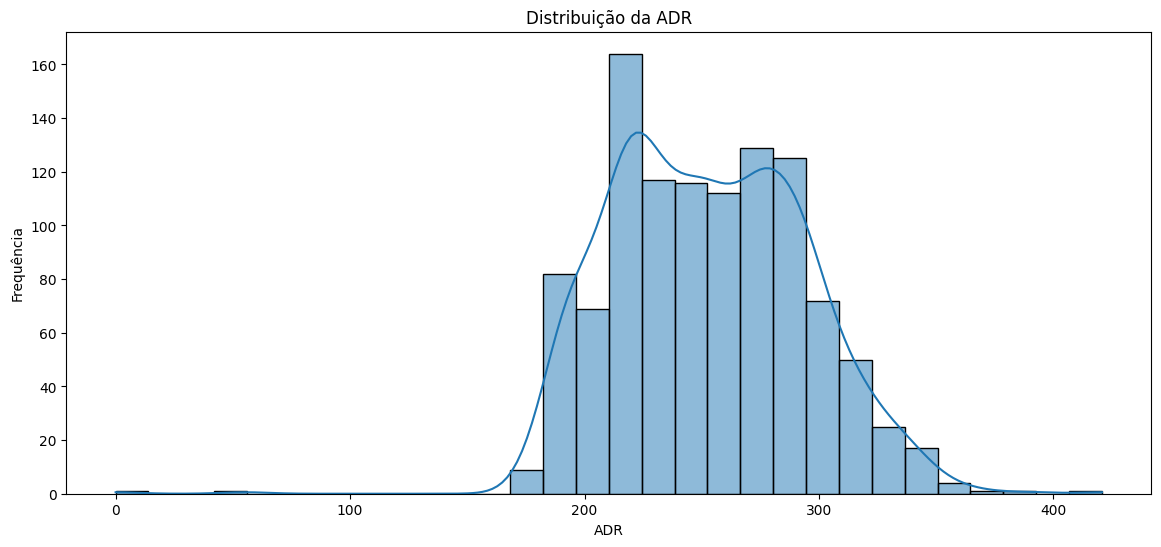

In [ ]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df_ajustado, x='adr', bins=30, kde=True)
plt.title('Distribuição da ADR')
plt.xlabel('ADR')
plt.ylabel('Frequência')

Ocupação por dia de semana:

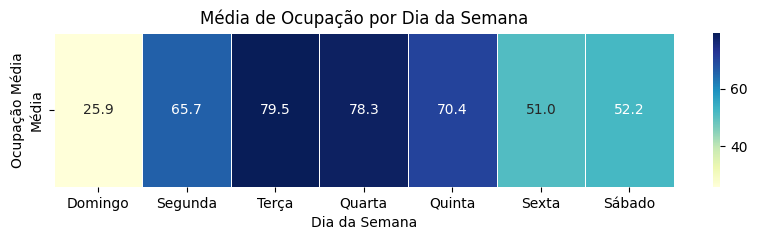

In [ ]:
media_occ_semana = df_ajustado.groupby('dia_semana')['occ'].mean()

heatmap = pd.DataFrame(media_occ_semana).T
plt.figure(figsize=(10, 2))
sns.heatmap(heatmap, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5,
            xticklabels=['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'],
            yticklabels=['Média']) # Add labels for x and y axis
plt.title('Média de Ocupação por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Ocupação Média')
plt.show()

Tendencias:

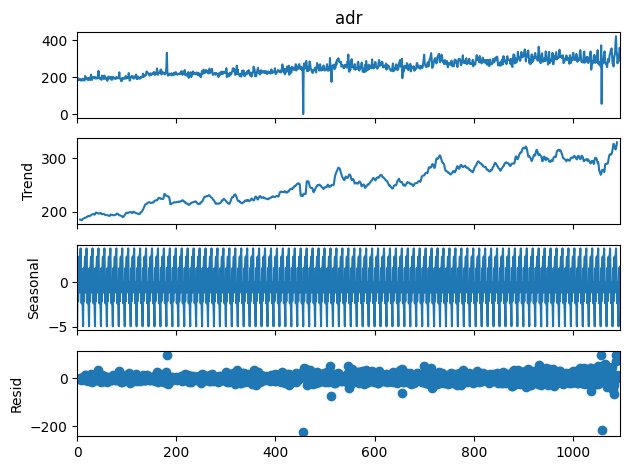

In [ ]:
dec = sm.tsa.seasonal_decompose(df_ajustado['adr'], period=12, model='additive').plot()
plt.show()

## Previsão SARIMA dos próximos períodos:

Biblioteca:

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

Pré processamento dos dados:

In [ ]:
df_ajustado['data'] = pd.to_datetime(df_ajustado['data'], unit='s')
df_ajustado.set_index('data', inplace=True)

Seleção das séries temporais:

In [ ]:
occ_series = df_ajustado['occ']
adr_series = df_ajustado['adr']

Treinamento SARIMA para a OCC:

In [ ]:
model_occ = SARIMAX(occ_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
result_occ = model_occ.fit(disp=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Treinamento SARIMA para a ADR:

In [ ]:
model_adr = SARIMAX(adr_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
result_adr = model_adr.fit(disp=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Previsão para os próximos 30 dias:

In [ ]:
forecast_occ = result_occ.get_forecast(steps=30).predicted_mean
forecast_adr = result_adr.get_forecast(steps=30).predicted_mean

Visualização:

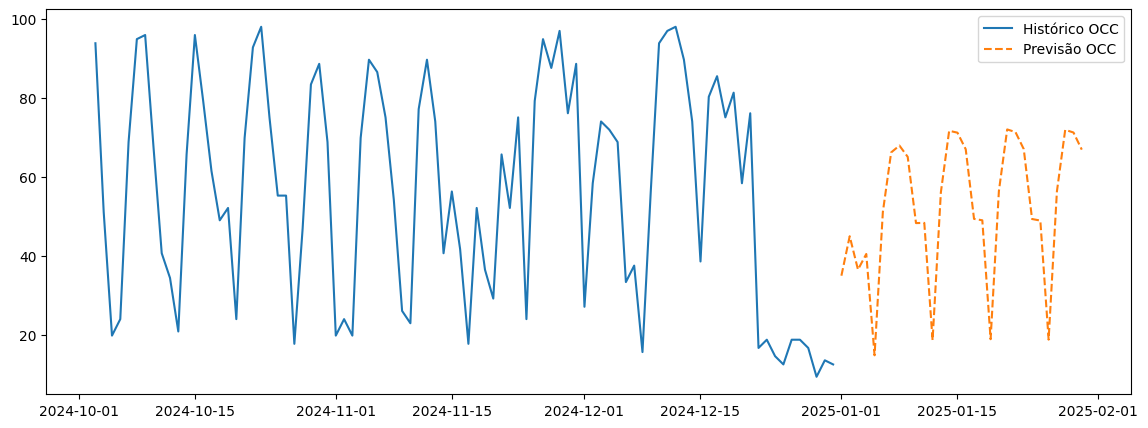

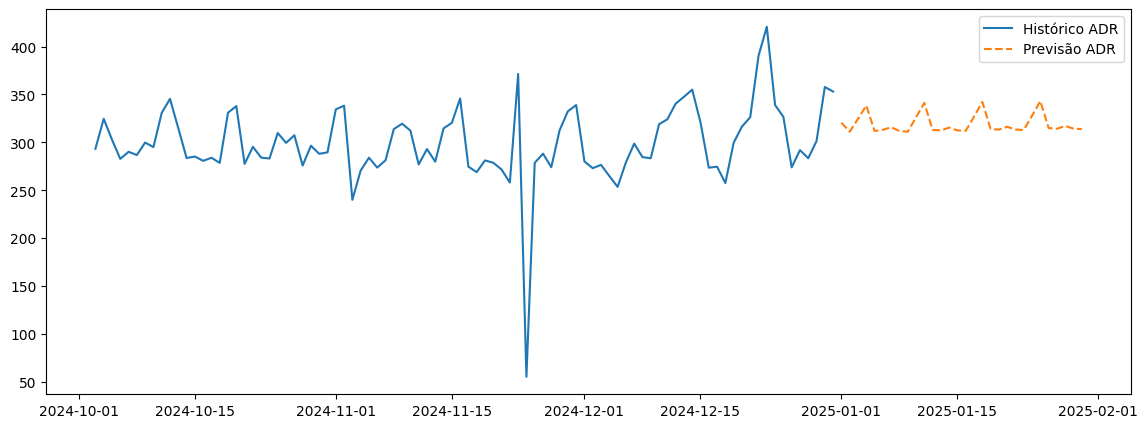

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(occ_series[-90:], label='Histórico OCC')
plt.plot(forecast_occ.index, forecast_occ, label='Previsão OCC', linestyle='--')
plt.legend()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(adr_series[-90:], label='Histórico ADR')
plt.plot(forecast_adr.index, forecast_adr, label='Previsão ADR', linestyle='--')
plt.legend()
plt.show()